### Scatterplot Matrices
Scatterplot matrices are a great way to roughly determine if we have a linear correlation between multiple variables. This is particularly helpful in pinpointing specific variables that might have similar correlations to my key data.

The data set comprises multiple variables: Days, Date (Months), US Average coal price (AveCoalPrice - US$/tons), Cushing, OK WTI Spot Price FOB (Oil Price - (Dollars per Barrel)), U.S. Natural Gas Gross Withdrawals (GrossGasProd (MMMcf)), U.S. Natural Gas Total Consumption (TotGasCons-(MMMcf)), Henry Hub Natural Gas Spot Price (GasPrice (Dollars per Million Btu)), Weather and the Status of gas price (High or Low - Price higher than the average is High and below average price is Low)

In [8]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style="ticks")

Here the data is loaded.

In [9]:
df=pd.read_excel("data/DataSet_GasPrice_ Monthly.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,GasPriceStatus
0,31,2008-05-31,75.85,125.40,2153.316,1576.387,11.27,SPRING,HIGH
1,61,2008-06-30,81.18,133.88,2118.791,1604.249,12.69,SUMMER,HIGH
2,92,2008-07-31,89.19,133.37,2205.260,1708.641,11.09,SUMMER,HIGH
3,123,2008-08-31,87.05,116.67,2193.566,1682.924,8.26,SUMMER,HIGH
4,153,2008-09-30,85.63,104.11,1919.520,1460.924,7.67,FALL,HIGH


The scatterplot matrix is generated. The variables are written in a diagonal line from top left to bottom right. Then each variable is plotted against each other. 

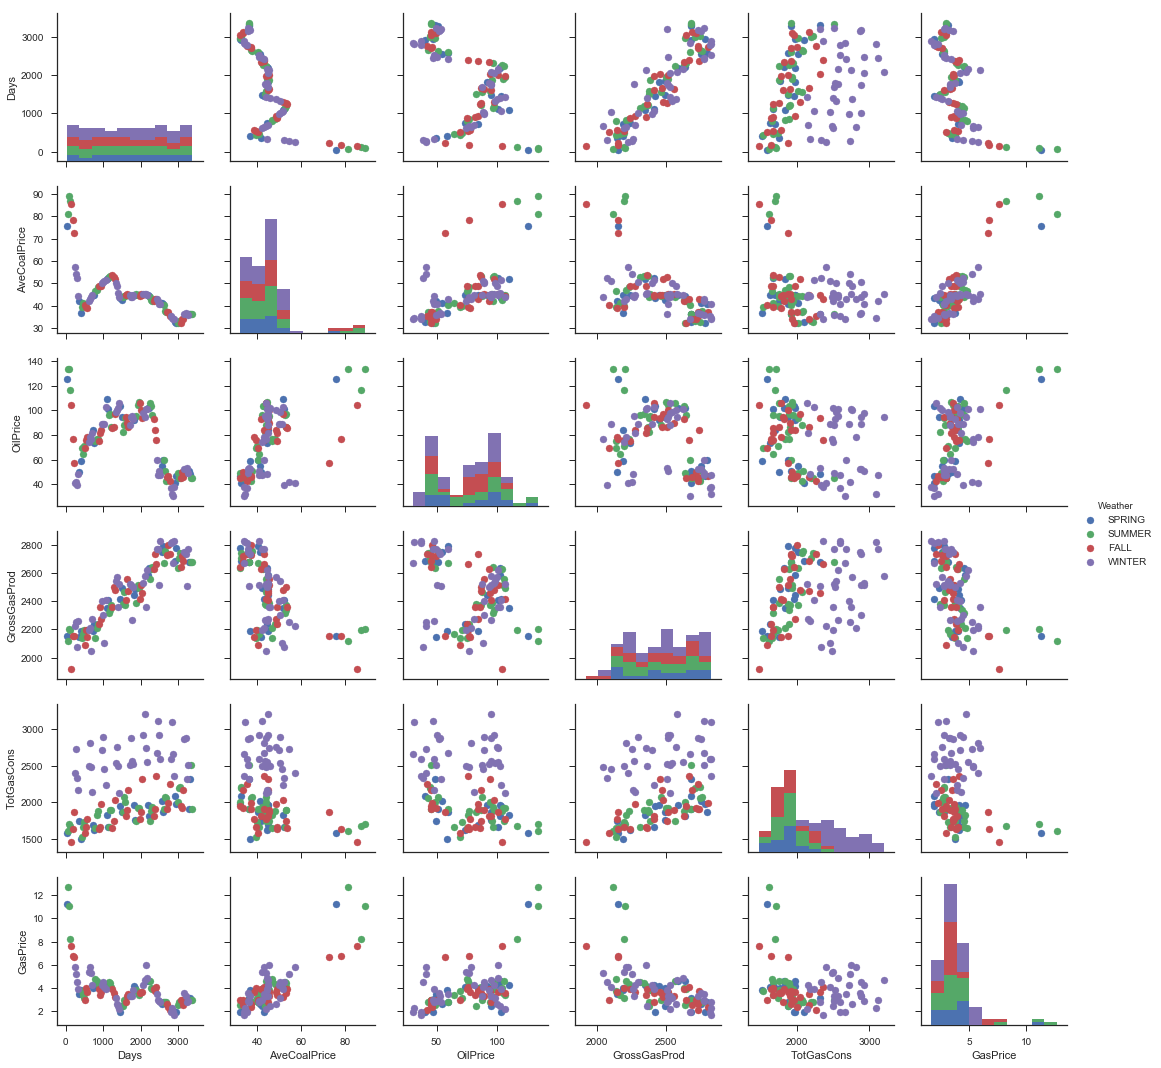

In [19]:
g = sns.PairGrid(df, hue="Weather")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
g.add_legend();


In this scatterplot, it is probably safe to say that there is a correlation between Gas Price and Coal Price and also between Gas Price and Oil Price because the plots look like a line. Gas Production has steadily been on the increase, and there seems to be a logarithmic relationship between Gas production Gas price. There is probably less of a correlation between Oil Price and Total Gas Consumption in addition to Coal Price and Total gas production. More statistical analyses would be needed to confirm or deny this.

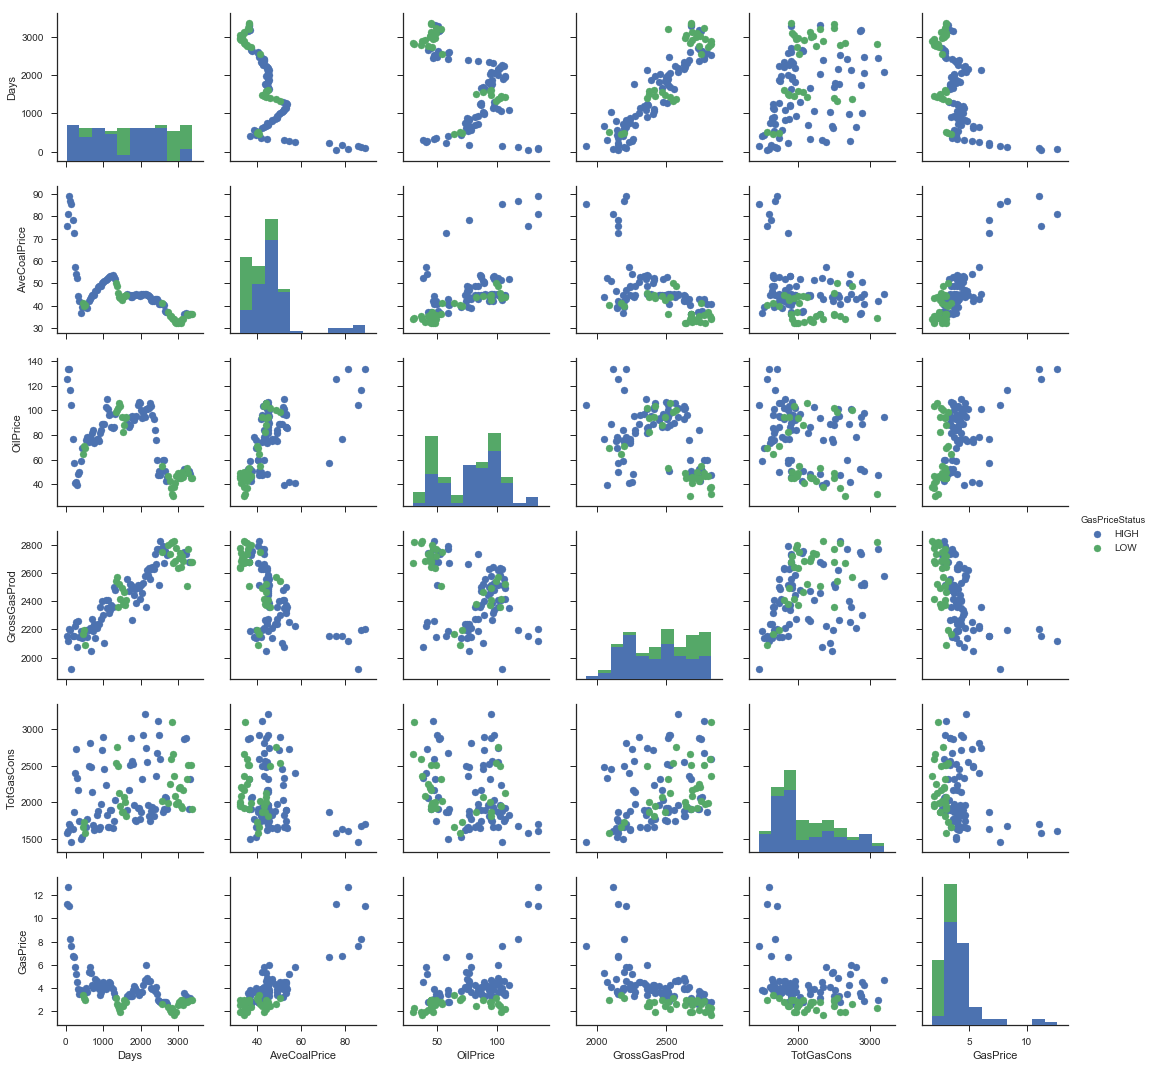

In [20]:
g = sns.PairGrid(df, hue="GasPriceStatus")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
g.add_legend();

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Angus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


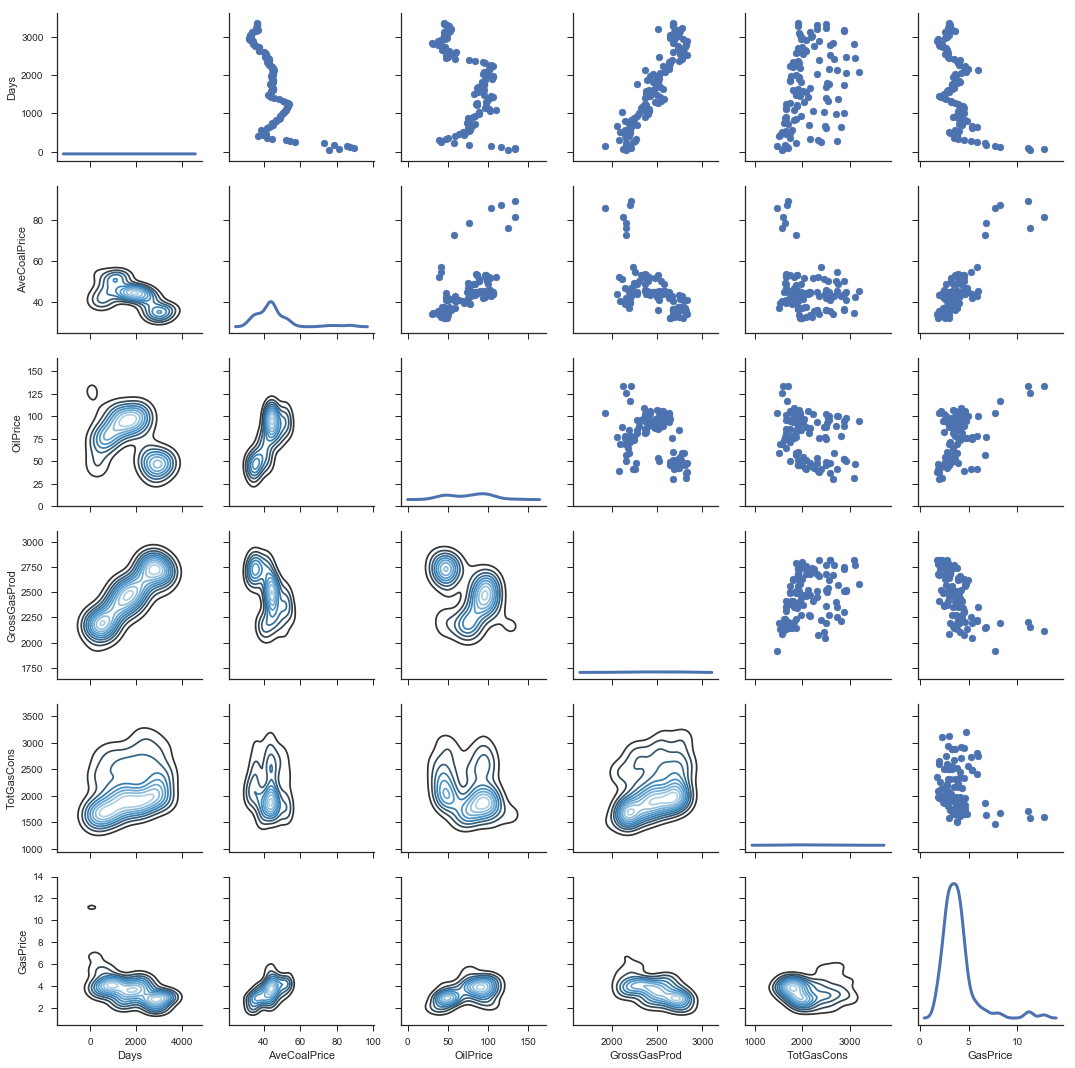

In [22]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=True);

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


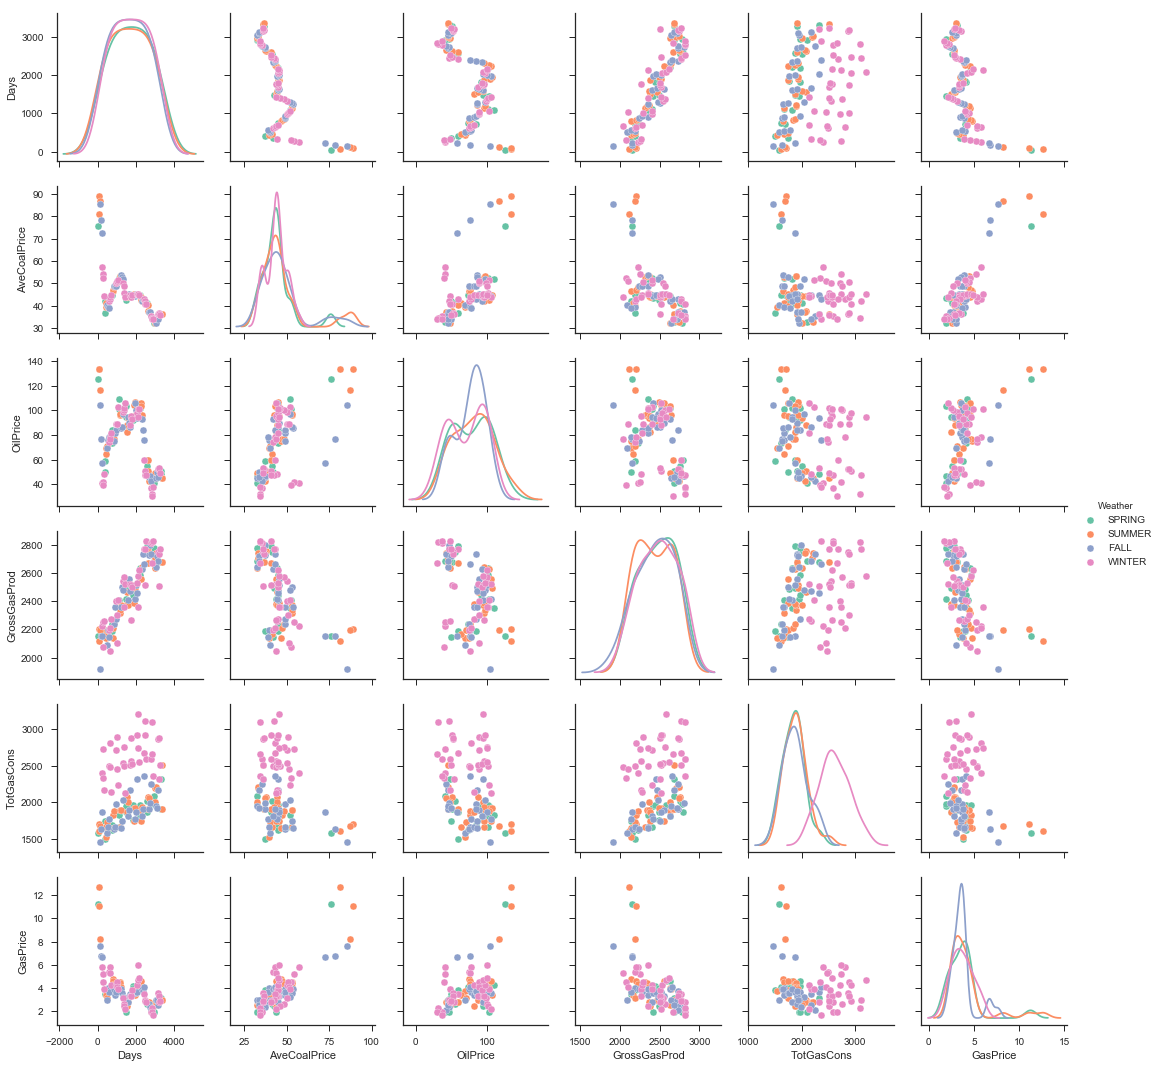

In [26]:
g = sns.pairplot(df, hue="Weather", palette="Set2", diag_kind="kde", size=2.5)